<a href="https://colab.research.google.com/github/Kartihkeya/codesoft-sales-/blob/main/salespredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [2]:
df=pd.read_csv("/content/Advertising.csv")

Analysing Data

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
#drop unnadmed column as it is a index
df=df.drop(df.columns[0],axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Check for missing data

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data visuvalization

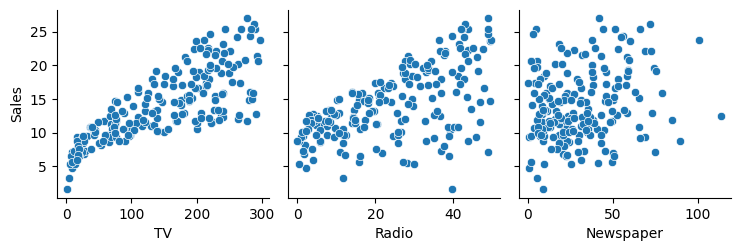

In [11]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

<Axes: >

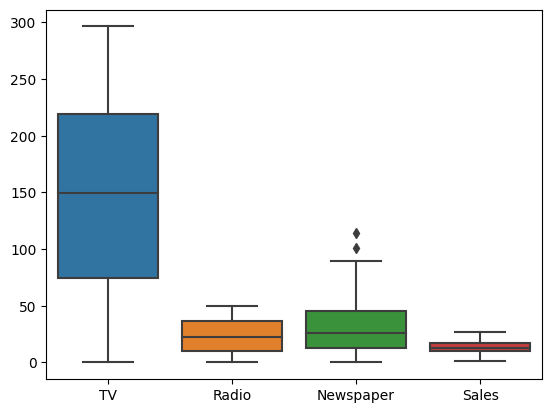

In [12]:
sns.boxplot(data=df)

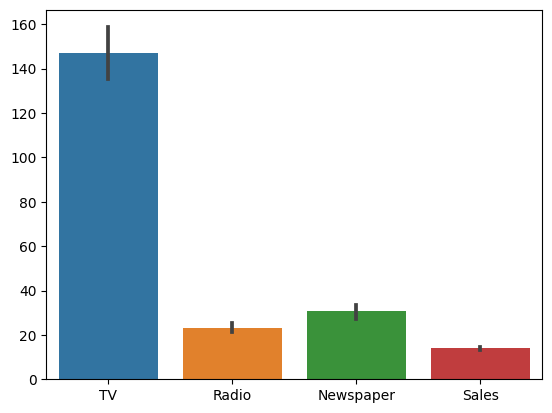

In [13]:
sns.barplot( data = df)
plt.show()

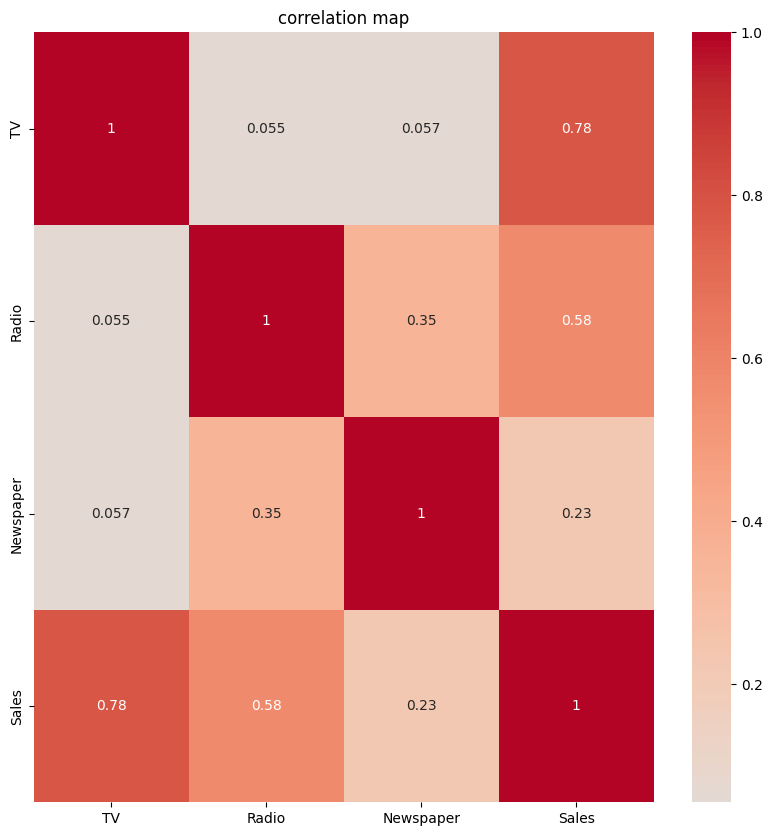

In [14]:
matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matrix,annot=True,cmap="coolwarm",center=0)
plt.title("correlation map")
plt.show()

Modeling

In [15]:
X=df.drop(columns="Sales",axis=1)
Y=df["Sales"]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
x_train

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [18]:
y_train

134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64

In [19]:
x_test

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [20]:
y_test

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
res= model.predict(x_test)
print(res)

[10.05739563  7.4522807   7.0197076  24.08029725 12.01786259  6.53793858
 12.78286918 15.10974587 10.76974013 16.34357951 22.88297477  9.12924467
 10.46455672 15.48743552 11.58555633 12.17296914 18.76551502 10.78318566
 15.90515992 17.30651279 24.06692057  9.59834224 15.13512211 12.38591525
  5.71360885 15.24749314 12.29402334 20.9421167  13.40991558  9.04348832
 12.89239415 21.40272028 18.13802209 21.17320803  6.56974433  6.14114206
  7.89018394 13.01541434 14.68953791  6.18835143]


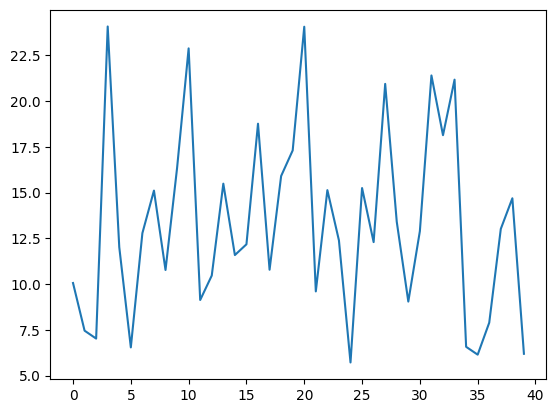

In [23]:
plt.plot(res)

Regression

In [24]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
std=StandardScaler()
x_trainscaler=std.fit_transform(x_train)
x_testscaler=std.fit_transform(x_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(x_trainscaler,y_train)
y_pred=lr.predict(x_testscaler)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

5.408913759032385
0.8281217233452884


<function matplotlib.pyplot.show(close=None, block=None)>

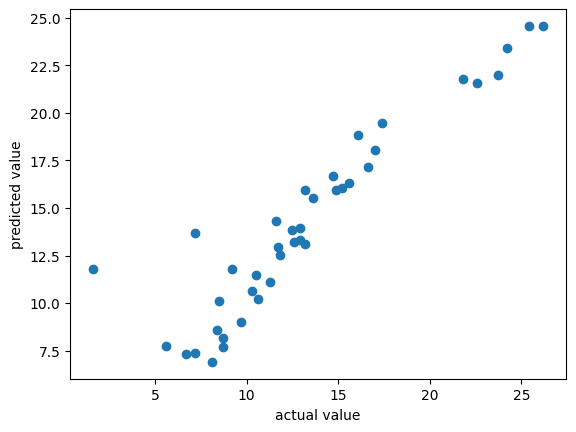

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show

Text(0, 0.5, 'predict')

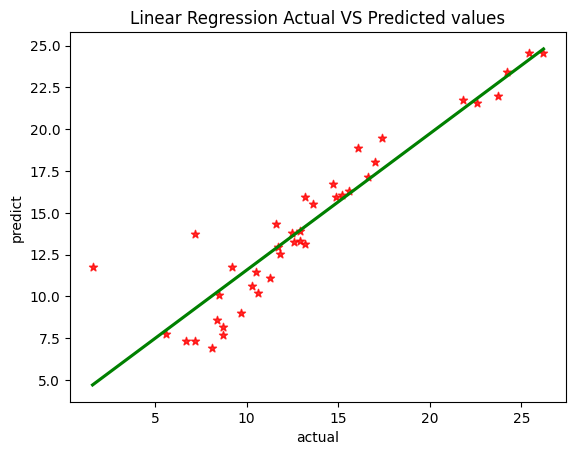

In [27]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red', marker="*",line_kws={"color": "green"})
plt.title("Linear Regression Actual VS Predicted values")
plt.xlabel("actual")
plt.ylabel("predict")